# Cap. 6 - NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Transformada de Fourier discreta



### Em uma dimensão

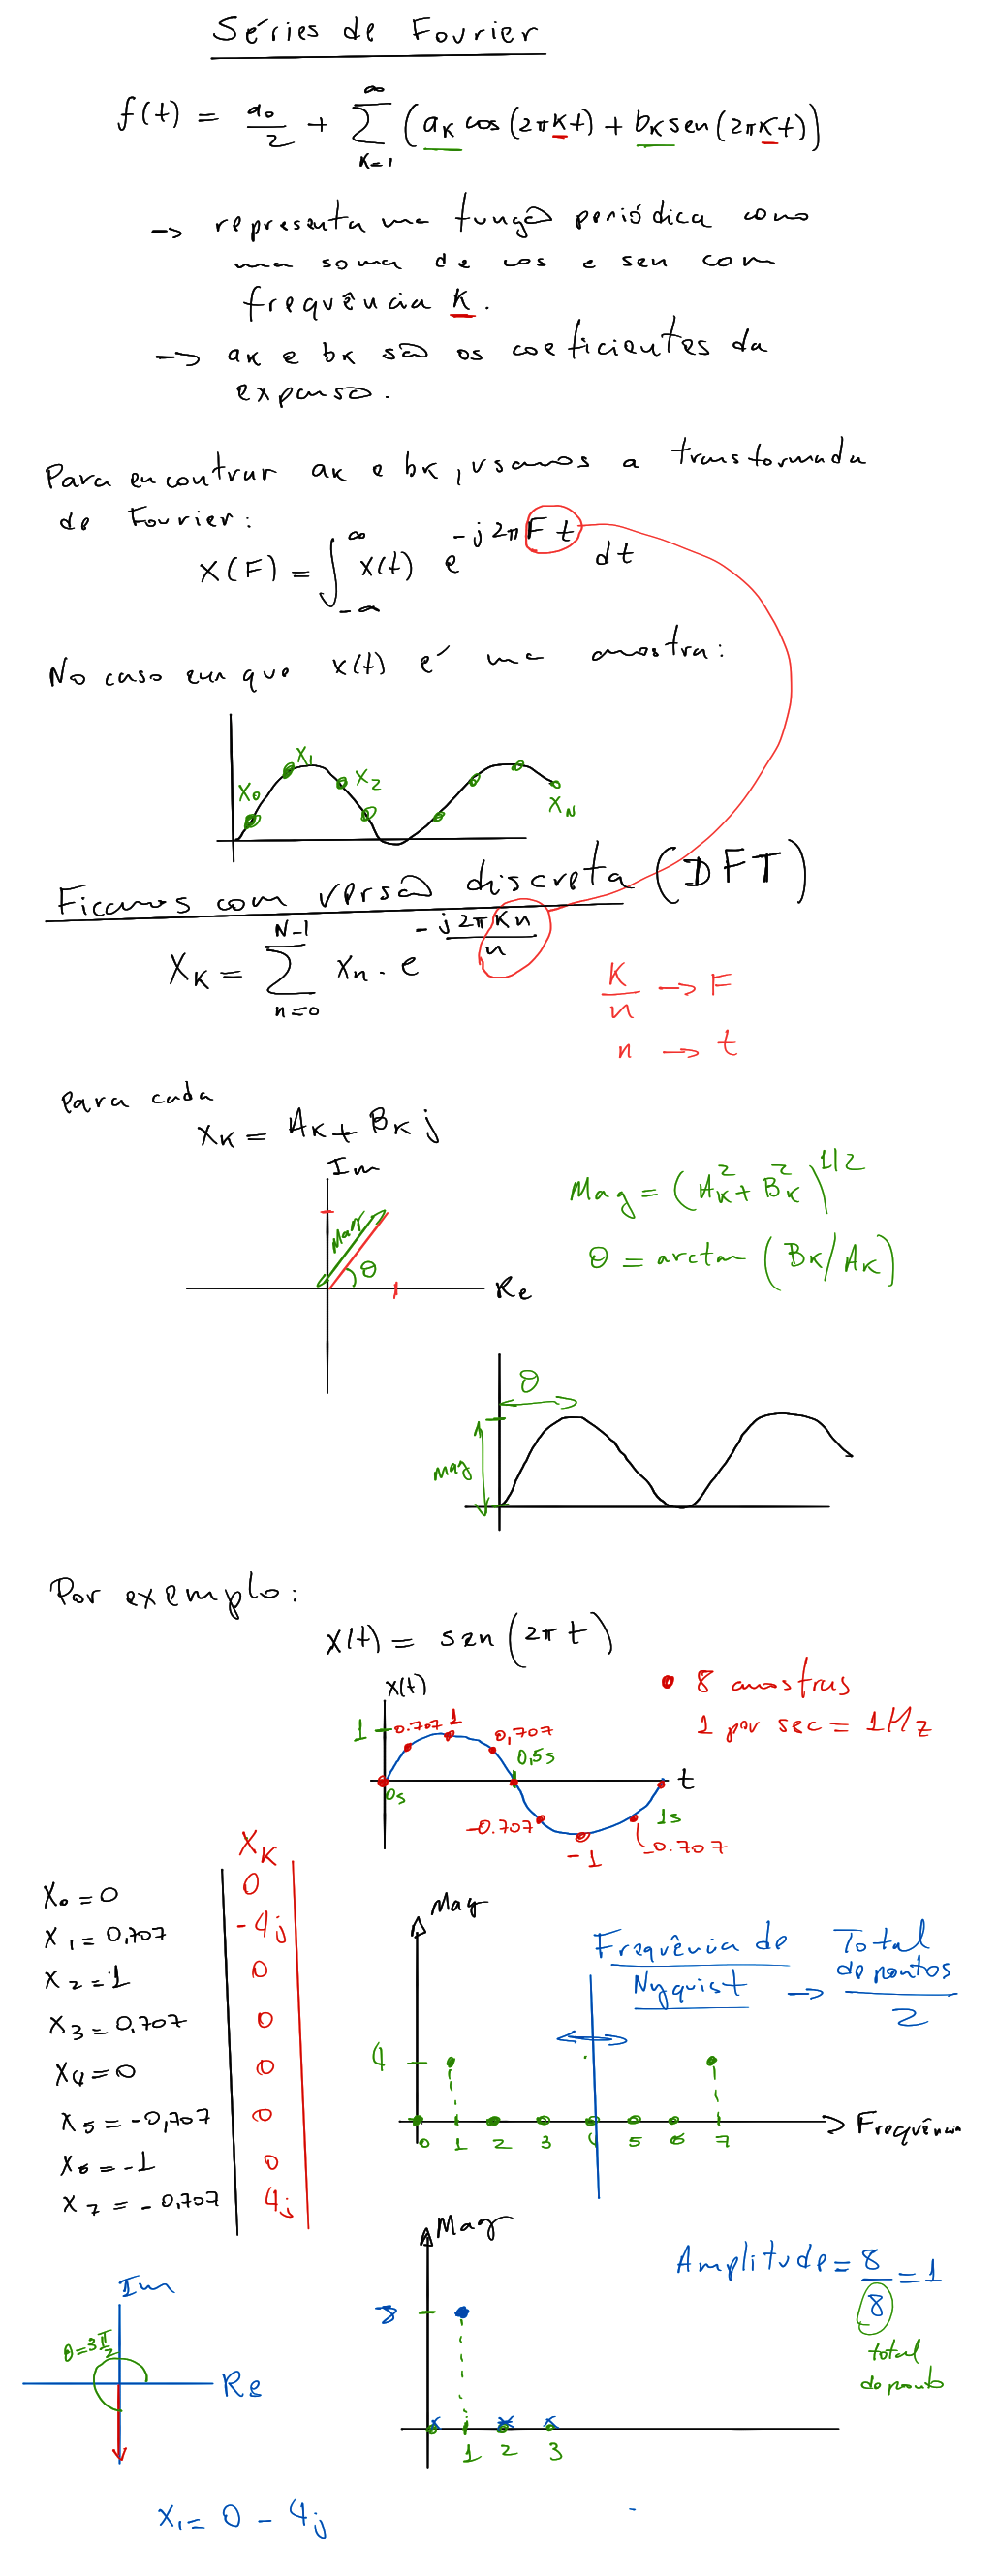

O `np.fft` é um submódulo do numpy com as funções para transformadas de Fourier discretas.

`np.fft.fft` calcula a transformada:

```F = fft(dado)```

- `F[:n/2]` frequências positivas;
- `F[n/2+1:]` frequências negativas;
- Amplitude = `np.abs(F)`;
- Espectro de potência = `np.abs(F)**2`;
- Ângulos de fase = `np.angle(F)`;


`np.fft.fftshift` centra o espectro em zero;
`np.fft.ifftshift` desfaz a centralização;

In [ ]:
t = np.linspace(0,1,8+1)
x = np.sin(2*np.pi*t)
x,t

(array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -2.44929360e-16]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]))

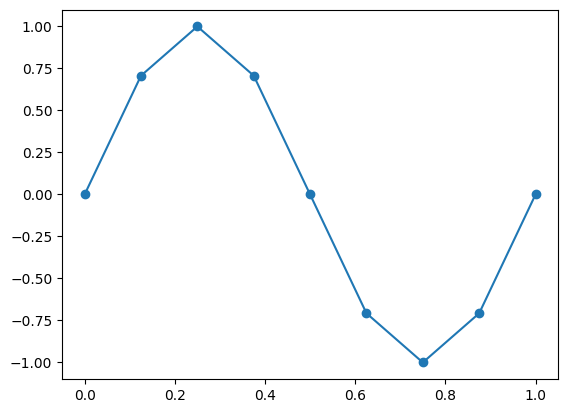

In [ ]:
plt.plot(t,x,'-o')

In [ ]:
sp = np.fft.fft(x)
sp

array([-2.22044605e-16+0.j        ,  1.40344523e+00-3.85593407j,
       -5.47670403e-01+0.65268817j, -4.39339828e-01+0.25365297j,
       -4.16434996e-01+0.07342873j, -4.16434996e-01-0.07342873j,
       -4.39339828e-01-0.25365297j, -5.47670403e-01-0.65268817j,
        1.40344523e+00+3.85593407j])

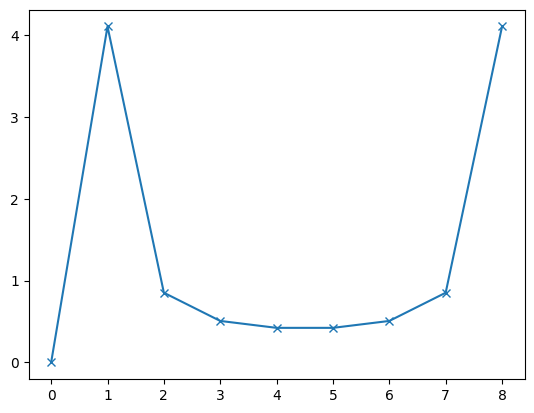

In [ ]:
# plt.plot(sp.real,"-o")
# plt.plot(sp.imag,"-x")
plt.plot(np.abs(sp),"-x")

In [ ]:
freq = np.fft.fftfreq(len(x),t[1]-t[0]) #t[1]-t[0] = 1/8
sp_shift = np.fft.fftshift(sp)
freq_shift = np.fft.fftshift(freq)

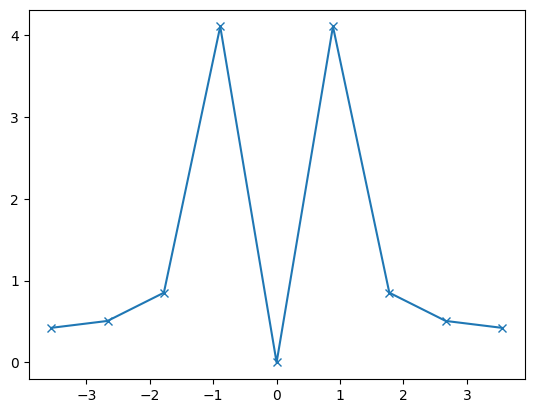

In [ ]:
plt.plot(freq_shift,np.abs(sp_shift),"-x")


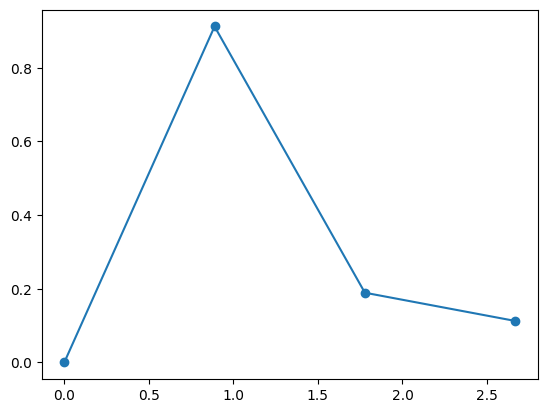

In [ ]:
n = len(x)

spec = (2/n)*np.abs(sp[:n//2])
plt.plot(freq[:n//2], spec , '-o')

In [ ]:
A1, A2 = 2, 1
freq1, freq2 = 10, 50
fsamp = 500
t = np. arange(0, 1, 1/ fsamp)
n = len(t)
f = A1*np.sin(2*np.pi*freq1*t) + A2*np.sin(2*np.pi*freq2*t)
f += 0.5*np.random.randn(n)

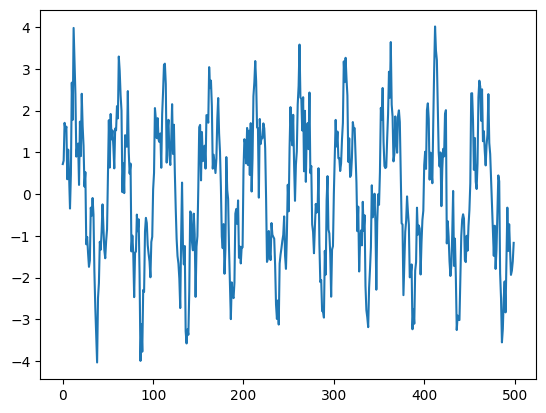

In [ ]:
plt.plot(f)

In [ ]:
F = np.fft.fft(f)

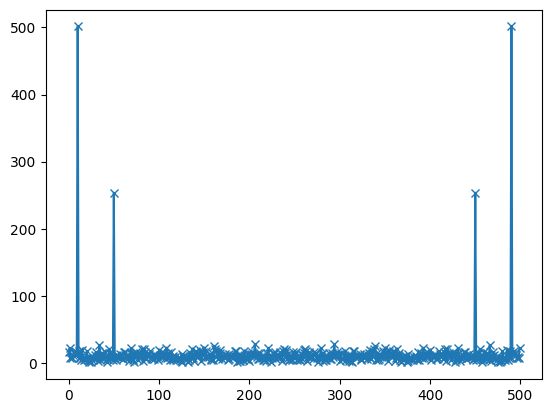

In [ ]:
plt.plot(np.abs(F),"-x")


In [ ]:
freq = np.fft.fftfreq(len(t),t[1]-t[0]) #t[1]-t[0] = 1/8
F_shift = np.fft.fftshift(F)
freq_shift = np.fft.fftshift(freq)

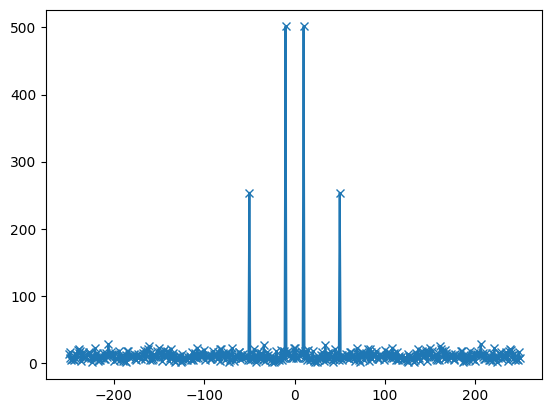

In [ ]:
plt.plot(freq_shift,np.abs(F_shift),"-x")


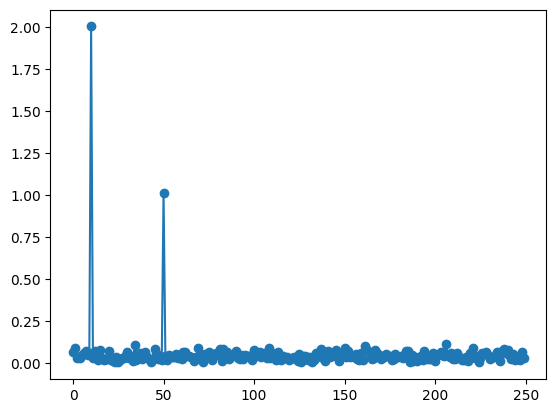

In [ ]:
n = len(t)
spec = (2/n)*np.abs(F[:n//2])
plt.plot(freq[:n//2], spec , '-o')

In [ ]:
f[:10]

array([ 0.71931078,  0.80298136,  1.70753969,  1.52263434,  1.61646076,
        0.3556849 ,  1.06496948,  0.43946618, -0.34665929,  0.48000028])

In [ ]:
F[:10]

array([ 16.1858032  +0.j        , -17.09688185+13.60199939j,
        -1.94197503 -7.75715269j,   4.31814193 -7.97942508j,
        -4.20209753 -6.11547232j,  -0.82653609+11.20076415j,
        -2.84104508-15.03850178j, -12.34666578+13.86901732j,
       -10.12294439 +7.40252418j,  11.83018526 -9.12908729j])

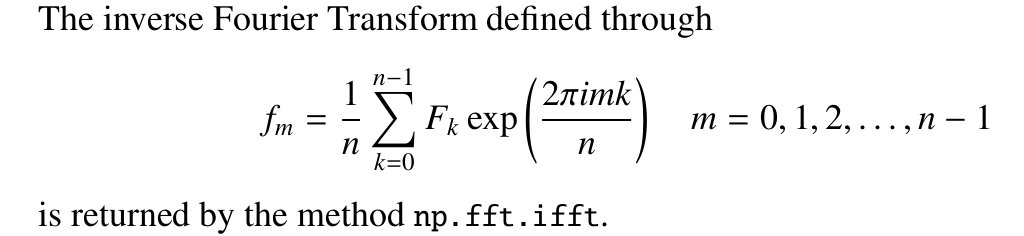

In [ ]:
#transforma inversa
np.fft.ifft(F)[:10]

array([ 0.71931078-1.57651669e-17j,  0.80298136-2.20268248e-16j,
        1.70753969+9.92539384e-17j,  1.52263434+1.91846539e-16j,
        1.61646076-1.55635065e-16j,  0.3556849 -1.79197311e-16j,
        1.06496948-1.07606684e-16j,  0.43946618+9.50671089e-17j,
       -0.34665929-2.54397408e-17j,  0.48000028+1.58708991e-16j])

### Em duas dimensões

Em duas dimensões temos:

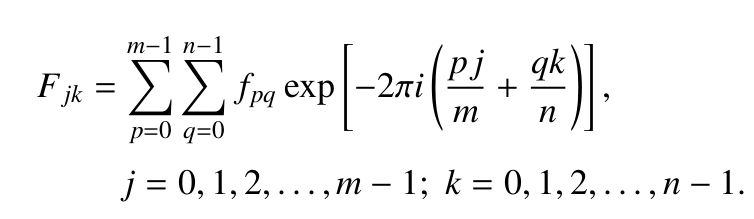

- $f_{pq}$ representa matriz.

- `np.fft.fft2` implementa a transformada discreta de Fourier em duas dimensões;
- `np.fft.ifft2` implementa sua inversa.

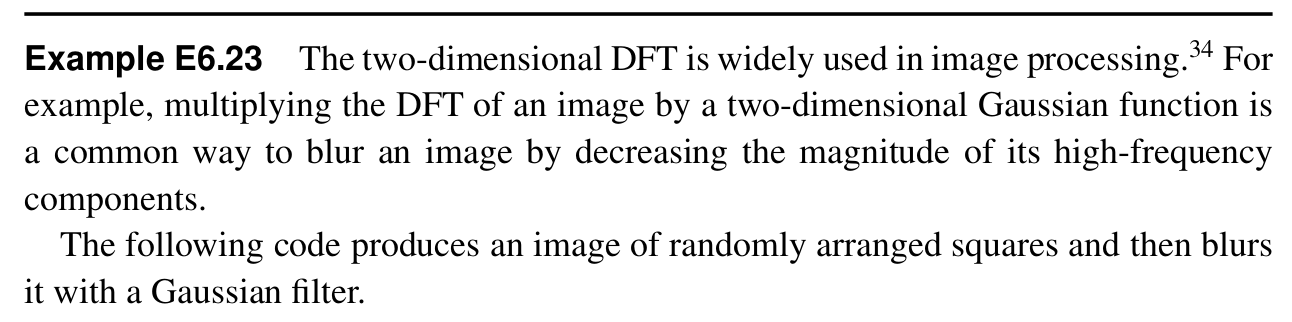

In [ ]:
# image size, square side length, number of squares
ncols, nrows = 120, 120
sq_size, nsq = 10, 20

# The image array (0=background, 1=square) and boolean array of allowed places
# to add a square so that it doesn't touch another or the image sides
image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)

#remove as bordas em baixo e a direita
sq_locs[1:-sq_size-1:,1:-sq_size-1] = True

def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # valid_locs is an array of the indices of True entries in sq_locs
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # pick one such entry at random, and add the square so its top left
    # corner is there; then update sq_locs
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0,i-sq_size-1), max(0, j-sq_size-1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False

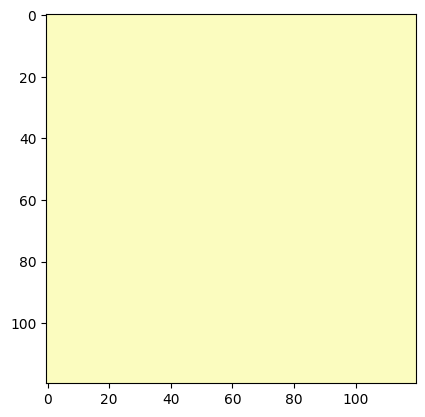

In [ ]:
plt.imshow(image,cmap='magma_r')

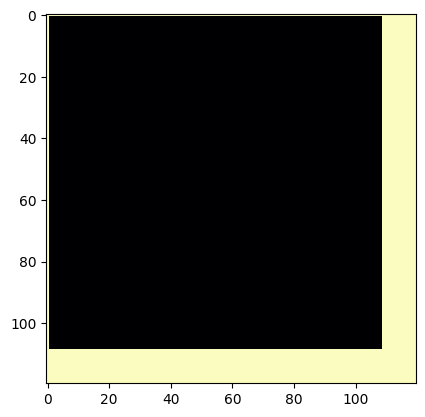

In [ ]:
plt.imshow(sq_locs,cmap='magma_r')

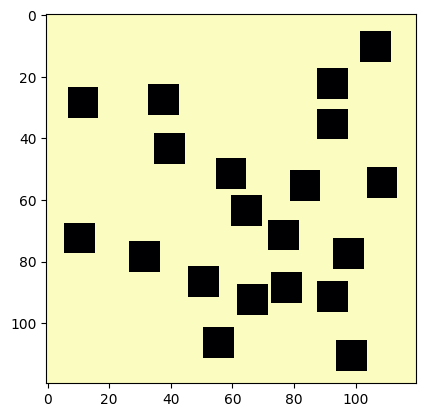

In [ ]:
for i in range(nsq):
    place_square()
plt.imshow(image,cmap='magma_r')

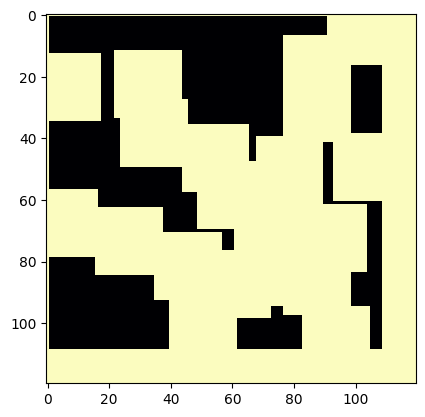

In [ ]:
plt.imshow(sq_locs,cmap='magma_r')

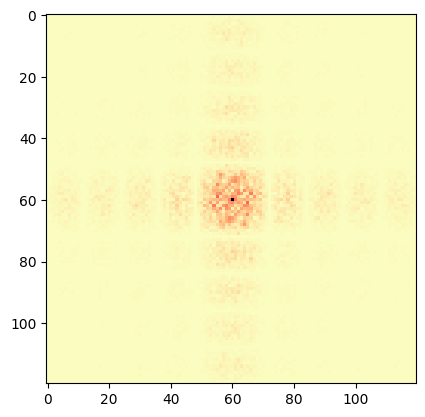

In [ ]:
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage),cmap='magma_r')

In [ ]:
ftimage

array([[-5.88228730e-16-9.58709038e-17j, -9.37233693e-16+1.46076930e-15j,
        -1.92138553e-15-1.92202090e-16j, ...,
        -1.43738848e-15+1.23717593e-15j, -2.34741334e-16-2.86475701e-16j,
         1.19817572e-15+8.98401703e-16j],
       [-4.13255208e-16+2.88664785e-16j, -1.64753348e-02-2.61116013e-01j,
         3.59881894e-02-3.27553569e-01j, ...,
        -7.06684210e-01-1.27334397e+00j, -3.99959154e-01+4.78841501e-01j,
        -1.39270409e-02+5.96624107e-02j],
       [ 7.13778219e-16+6.96304613e-16j, -6.99561507e-01-1.13789630e-01j,
         2.06417734e-01+3.77527915e-01j, ...,
         1.57044497e+00+1.67426232e+00j, -1.03571613e+00+1.73824743e-01j,
         4.06078448e-01-7.64096047e-01j],
       ...,
       [-1.02490284e-15+3.80122588e-16j, -5.78571798e-02-9.97909332e-01j,
         1.07852350e+00+2.09124429e+00j, ...,
        -1.20713066e-01-8.73172427e-02j, -1.15521598e+00-1.49466070e+00j,
         2.05495981e-01+2.39537765e-01j],
       [ 2.01831635e-16+3.77200400e-16j,  4.

In [ ]:
# Build and apply a Gaussian filter.
sigmax, sigmay = 10, 10
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

In [ ]:
gmask

array([[5.38018616e-32, 1.78613335e-31, 5.81029217e-31, ...,
        5.81029217e-31, 1.78613335e-31, 5.38018616e-32],
       [1.78613335e-31, 5.92966906e-31, 1.92892147e-30, ...,
        1.92892147e-30, 5.92966906e-31, 1.78613335e-31],
       [5.81029217e-31, 1.92892147e-30, 6.27478196e-30, ...,
        6.27478196e-30, 1.92892147e-30, 5.81029217e-31],
       ...,
       [5.81029217e-31, 1.92892147e-30, 6.27478196e-30, ...,
        6.27478196e-30, 1.92892147e-30, 5.81029217e-31],
       [1.78613335e-31, 5.92966906e-31, 1.92892147e-30, ...,
        1.92892147e-30, 5.92966906e-31, 1.78613335e-31],
       [5.38018616e-32, 1.78613335e-31, 5.81029217e-31, ...,
        5.81029217e-31, 1.78613335e-31, 5.38018616e-32]])

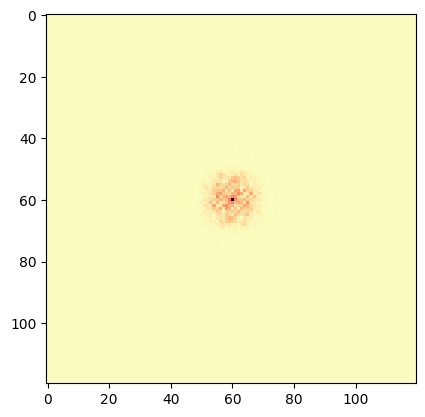

In [ ]:
ftimagep = ftimage * gmask
plt.imshow(np.abs(ftimagep),cmap='magma_r')

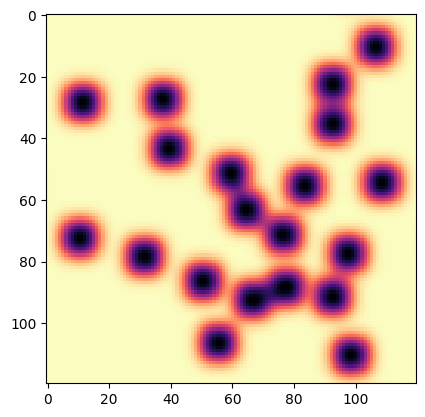

In [ ]:
imagep = np.fft.ifft2(ftimagep)
plt.imshow(np.abs(imagep),cmap='magma_r')

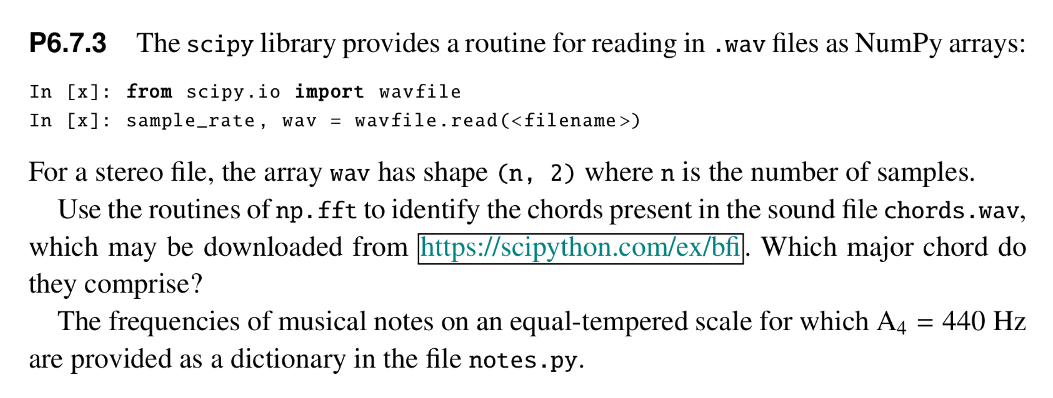

In [ ]:
!wget https://scipython.com/static/media/2/problems/P6.7/chord.wav

--2024-02-02 01:02:10--  https://scipython.com/static/media/2/problems/P6.7/chord.wav
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058444 (1.0M) [audio/x-wav]
Saving to: ‘chord.wav’

chord.wav           100%[===================>]   1.01M  3.32MB/s    in 0.3s    

2024-02-02 01:02:11 (3.32 MB/s) - ‘chord.wav’ saved [1058444/1058444]



In [ ]:
from scipy.io import wavfile

In [ ]:
sample_rate, wav = wavfile.read('chord.wav')

In [ ]:
sample_rate

44100

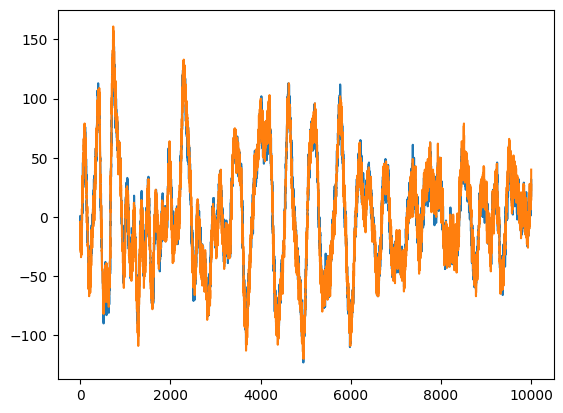

In [ ]:
plt.plot(wav[::,0][:10000])
plt.plot(wav[::,1][:10000])

In [ ]:
f_left = np.fft.fft(wav[::,0])
f_right = np.fft.fft(wav[::,1])
n = len(wav)
freq = np.fft.fftfreq(n,1/sample_rate)

In [ ]:
n,1/sample_rate

(264600, 2.2675736961451248e-05)

147.0


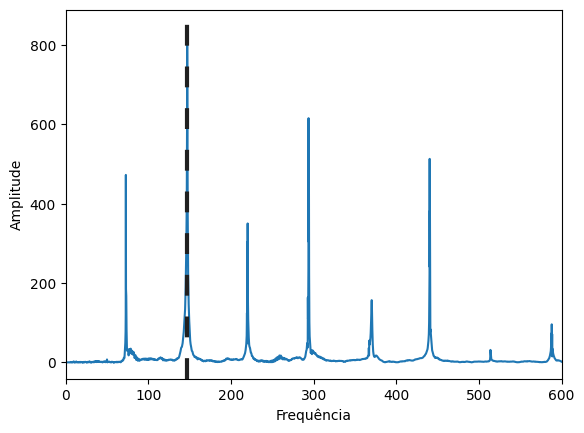

In [ ]:
spec_left = (2/n)*np.abs(f_left[:n//2])
spec_right = (2/n)*np.abs(f_right[:n//2])
# plt.plot(freq[:n//2], spec_left[::] , '-')
plt.plot(freq[:n//2], spec_right , '-')

plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.xlim(0,600)

plt.axvline(freq[:n//2][spec_right.argmax()],color='#202020',dashes=(5,5),lw=3)

print(freq[:n//2][spec_right.argmax()])

In [ ]:
freq[:n//2][spec_left.argmax()]

147.0

In [ ]:
import librosa

In [ ]:
librosa.hz_to_note(440.0)

'A4'

In [ ]:
librosa.hz_to_note(147.0)

'D3'

In [ ]:
t = np.linspace(0,5,sample_rate*5)
data = np.sin(2*np.pi*147*t)

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data,rate=sample_rate)

In [ ]:
Audio(wav[::,1],rate=sample_rate)

In [ ]:
freq[:n//2][np.argwhere(spec_left>200)]

array([[ 72.83333333],
       [145.33333333],
       [145.5       ],
       [145.66666667],
       [145.83333333],
       [146.        ],
       [146.16666667],
       [146.33333333],
       [146.5       ],
       [146.66666667],
       [146.83333333],
       [147.        ],
       [147.16666667],
       [147.33333333],
       [147.5       ],
       [147.66666667],
       [147.83333333],
       [148.        ],
       [148.16666667],
       [219.66666667],
       [219.83333333],
       [220.16666667],
       [220.33333333],
       [293.66666667],
       [293.83333333],
       [294.        ],
       [294.16666667],
       [294.33333333],
       [294.5       ],
       [440.16666667],
       [440.33333333],
       [440.5       ],
       [440.66666667],
       [440.83333333]])

In [ ]:
t = np.linspace(0,5,sample_rate*5)
data = np.sin(2*np.pi*72*t)+np.sin(2*np.pi*147*t)+np.sin(2*np.pi*220*t)+\
       np.sin(2*np.pi*294*t)+np.sin(2*np.pi*440*t)
Audio(data,rate=sample_rate)

In [ ]:
Audio(wav[::,1],rate=sample_rate)

# Cap. 7 - Matplotlib


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Gráficos de linha e scatter

**Gráfico com um único axes**

- `plt.figure` é o objeto básico de uma figura. Ele contém todos os demais elementos

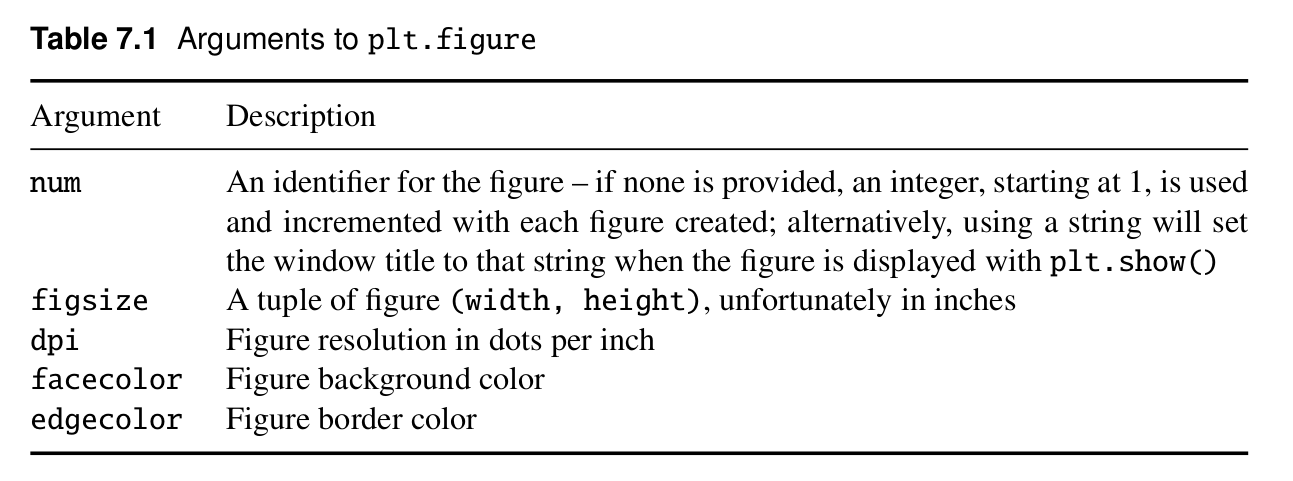

In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure('Population density',
                 figsize=(4.5, 2.),
                 facecolor='red')

<Figure size 450x200 with 0 Axes>

O objeto que contém o gráfico em si é o `axes`:

In [ ]:
ax = fig.add_subplot()

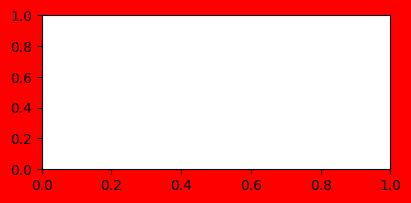

In [ ]:
fig

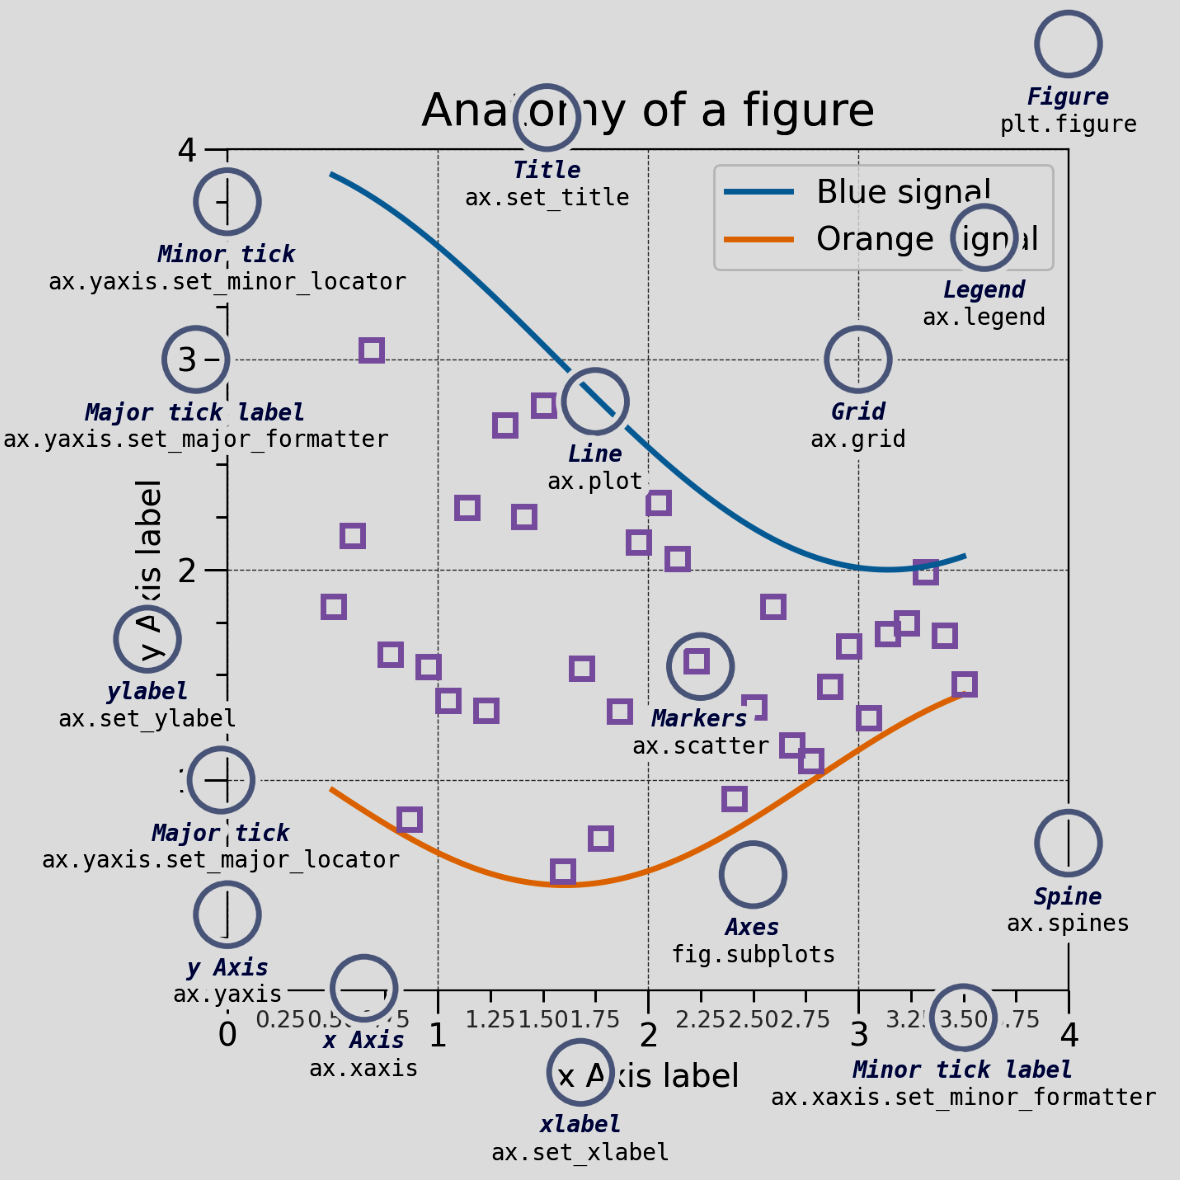

In [ ]:
a,=[1]

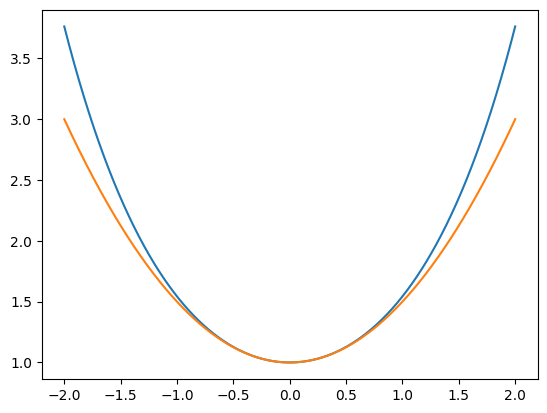

In [ ]:
#exemplo com as funções cosh e 1+x**2/2

fig = plt.figure()
ax = fig.add_subplot()

x = np.linspace(-2, 2, 1000)

#retorna uma lista e , seleciona o primeiro elemento
line_cosh, = ax.plot(x, np.cosh(x))
line_quad, = ax.plot(x, 1 + x**2 / 2)

In [ ]:
#Line2D
line_cosh,line_quad

(<matplotlib.lines.Line2D at 0x7a0af598b580>,
 <matplotlib.lines.Line2D at 0x7a0af598b850>)

Podemos criar o fig e ax simultaneamente usando a função `plt.subplots`:

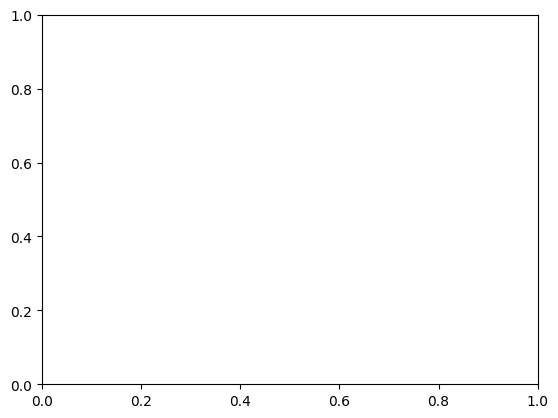

In [ ]:
fig, ax = plt.subplots()

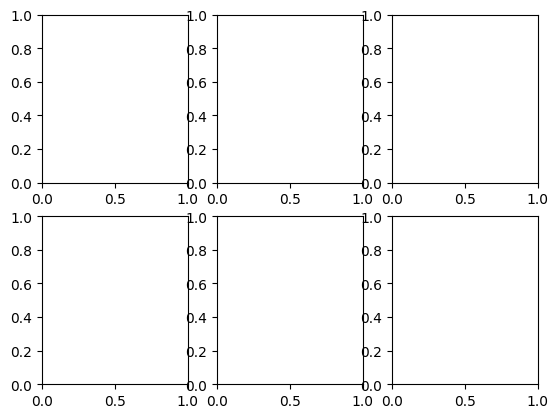

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3)

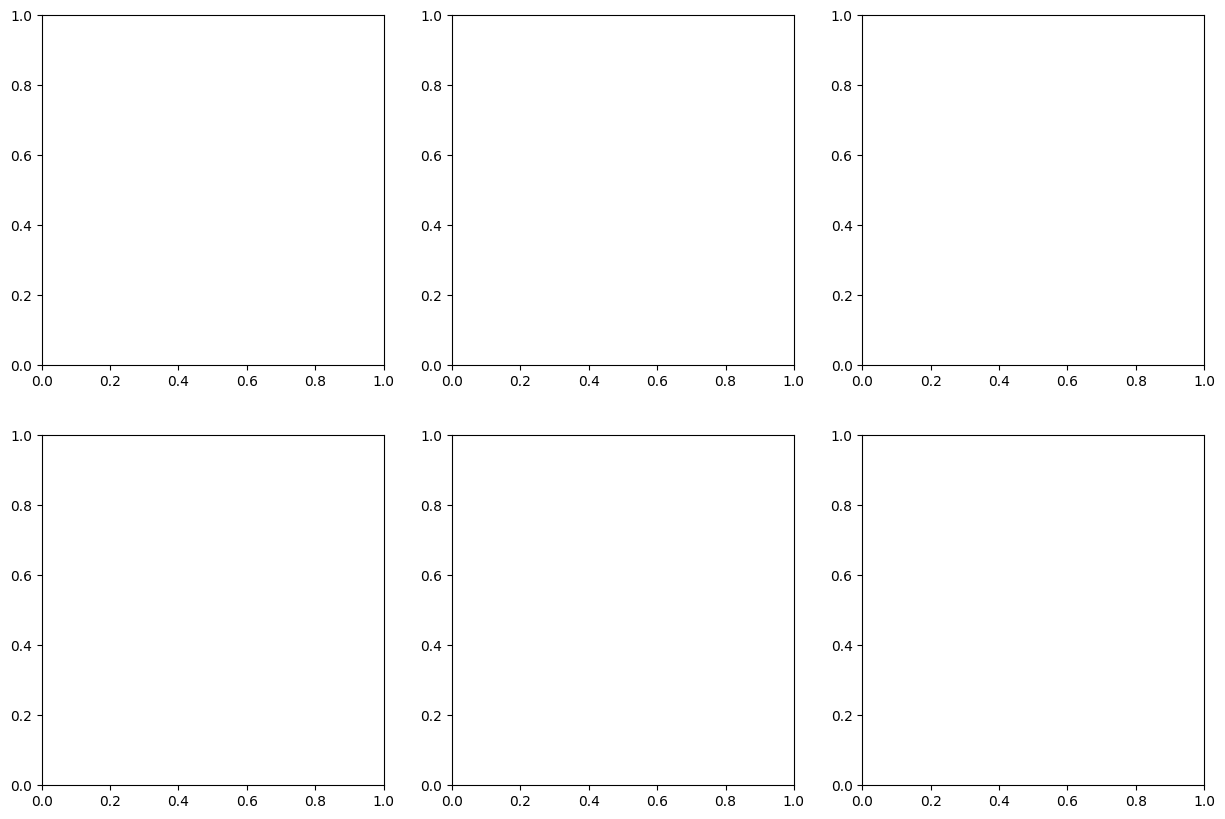

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,5*2))

**Limites para o gráfico**

In [ ]:
plt.xlim()

(0.0, 43.4)

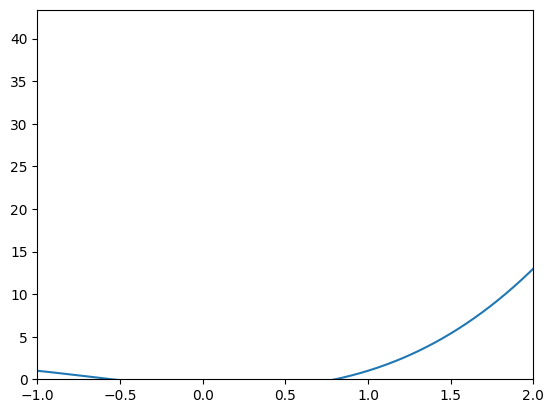

In [ ]:
x = np.linspace(-3, 3, 1000)
y = x**3 + 2 * x**2 - x - 1
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y)
ax.set_xlim(-1, 2)
ax.set_ylim(bottom=0)

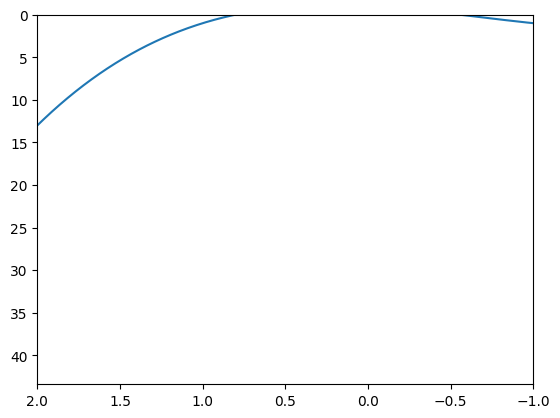

In [ ]:
x = np.linspace(-3, 3, 1000)
y = x**3 + 2 * x**2 - x - 1
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y)
ax.set_xlim(-1, 2)
ax.set_ylim(bottom=0)
#inverter eixos
ax.invert_xaxis()
ax.invert_yaxis()

**Estilo de linhas, marcadores e cores**

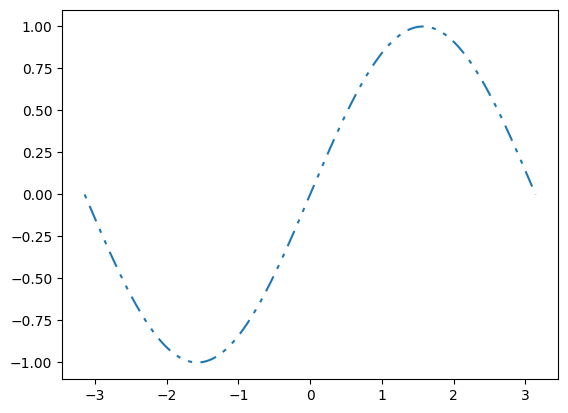

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 1000)

line, = ax.plot(x, np.sin(x))
#dash(2 pts),space(4 pts),dash(8 pts),space(4 pts),dash(2 pts),space(4 pts)
line.set_dashes([2, 4, 8, 4, 2, 4])

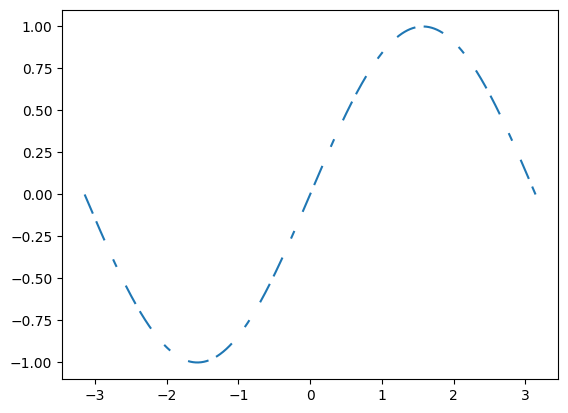

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 1000)

ax.plot(x, np.sin(x), dashes=[10,4,10])


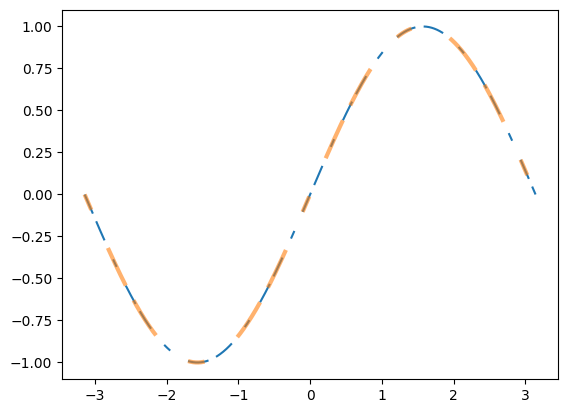

In [ ]:
#espessura da linha linewidth ou lw

f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 1000)

line, = ax.plot(x, np.sin(x), dashes=[10,4,10], linewidth=1.5) #1.5pt é o padrão
line, = ax.plot(x, np.sin(x), dashes=[4,10,10], linewidth=3, alpha=0.6)

**Cores**

Via argumento `color` ou `c`.

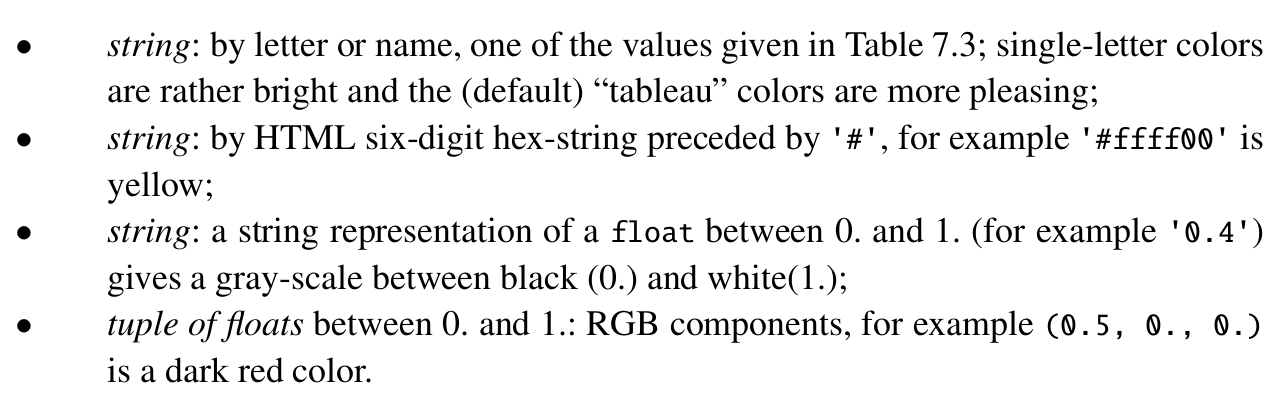

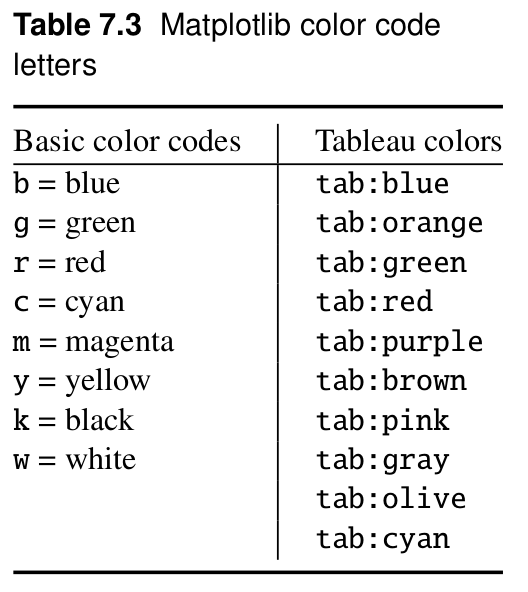

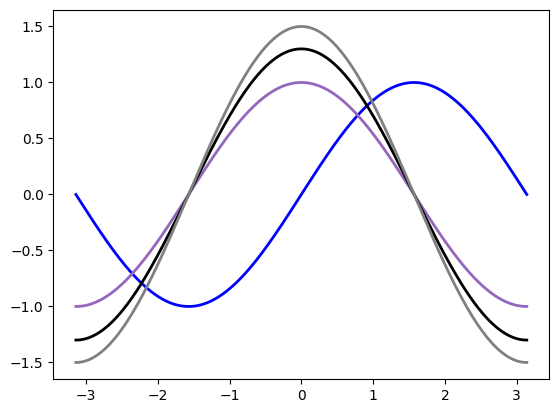

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 1000)

line, = ax.plot(x, np.sin(x), linewidth=2, c='b')
line, = ax.plot(x, np.cos(x), linewidth=2, c='tab:purple')
line, = ax.plot(x, 1.3*np.cos(x), linewidth=2, c='0.0')
line, = ax.plot(x, 1.5*np.cos(x), linewidth=2, c='0.5')

Por padrão, `Line2D` não inclui marcadores. Para mudar isso passamos o parâmetro `marker`:

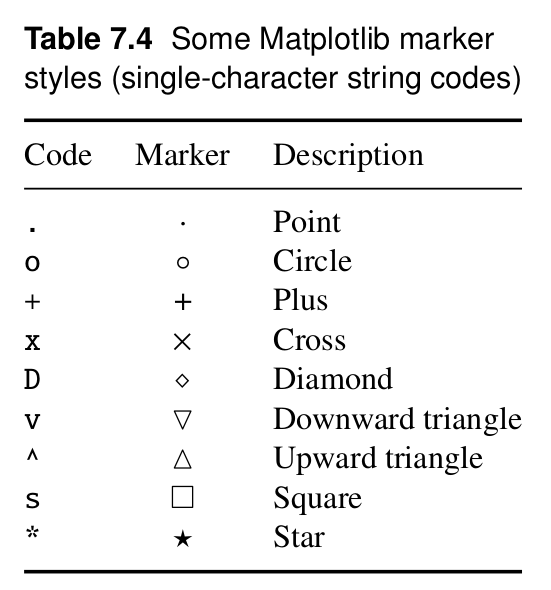

Temos mais possibilidades: https://matplotlib.org/stable/api/markers_api.html

Propriedades de uma marker:

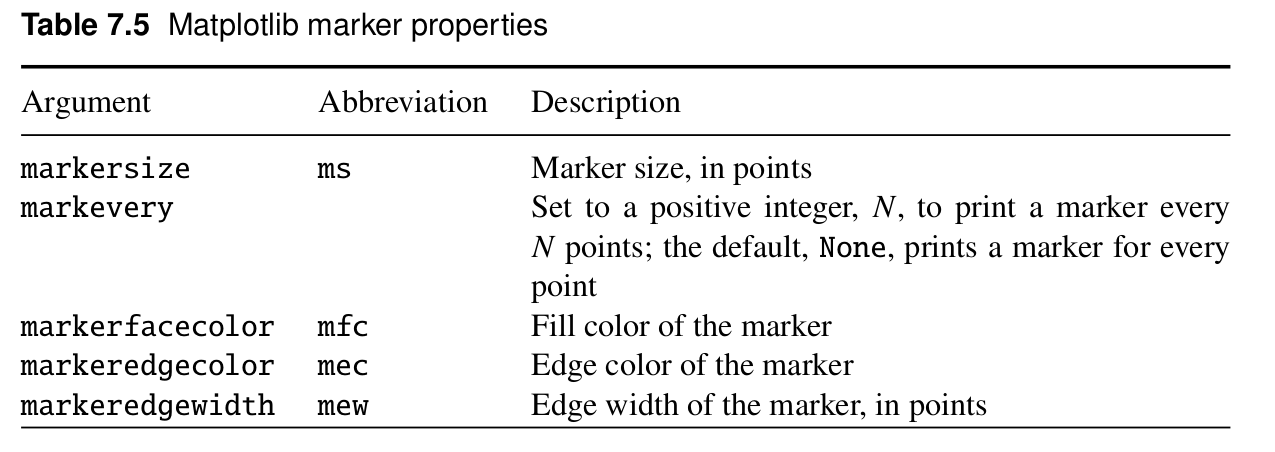

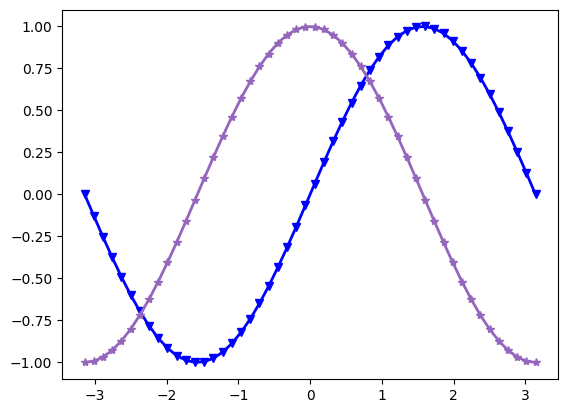

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 50)

line, = ax.plot(x, np.sin(x), linewidth=2, c='b', marker='v')
line, = ax.plot(x, np.cos(x), linewidth=2, c='tab:purple',marker='*')

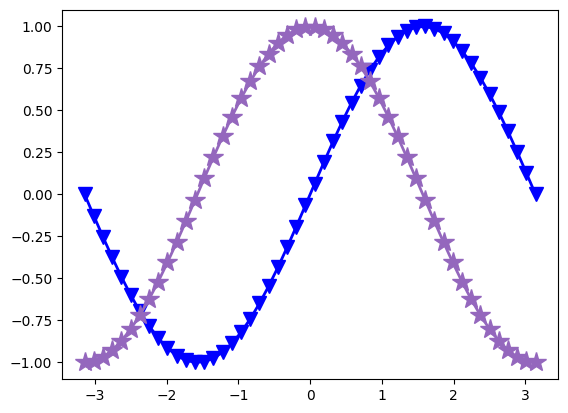

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 50)

line, = ax.plot(x, np.sin(x), linewidth=2, c='b', marker='v', ms=10)
line, = ax.plot(x, np.cos(x), linewidth=2, c='tab:purple',marker='*',ms=15)

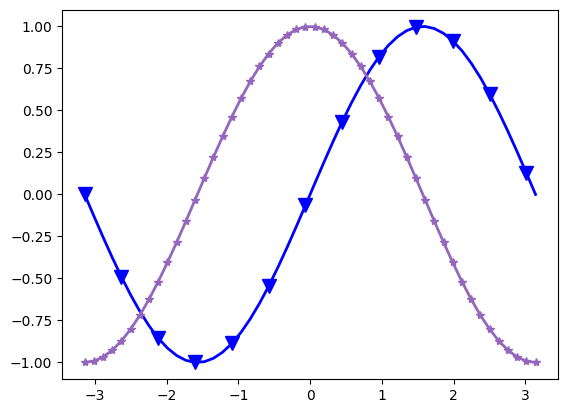

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 50)

line, = ax.plot(x, np.sin(x), linewidth=2, c='b', marker='v',
                markevery=4,#um marcador a cada 4 pontos
                ms=10)
line, = ax.plot(x, np.cos(x), linewidth=2, c='tab:purple',marker='*')

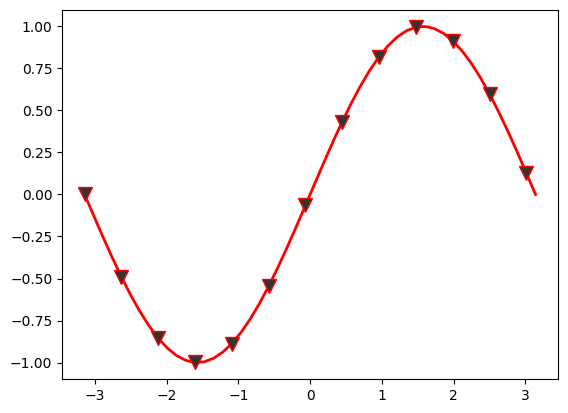

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 50)

line, = ax.plot(x, np.sin(x),
                linewidth=2,
                marker='v',
                markevery=4,
                ms=10,
                mfc='0.2',
                c='red'
                ) #um marcador a cada 4 pontos

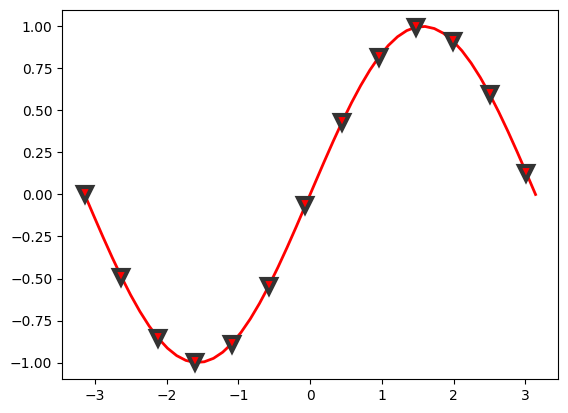

In [ ]:
f, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 50)

line, = ax.plot(x, np.sin(x),
                linewidth=2,
                marker='v',
                markevery=4,#um marcador a cada 4 pontos
                ms=10,
                mec='0.2',#cor da borda
                mew=3,#espessura da borda
                c='red'
                )

**Scatter plots ou gráficos de dispersão**

- `plt.scatter` cria esse tipo de gráfico:

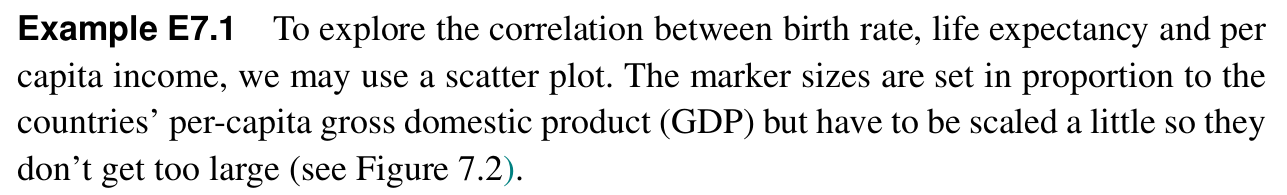

Text(0, 0.5, 'Expectativa de vida ao nascer (anos)')

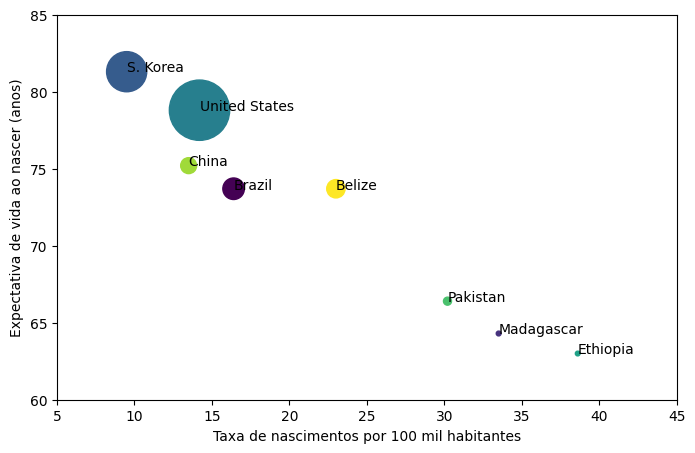

In [ ]:
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States',
             'Ethiopia', 'Pakistan', 'China', 'Belize']

# Taxa de nascimentos (/100k pessoas)
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]

# Expectativa de vida ao nascer (anos)
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]

# renda per capita (US Dollars em 2000)
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])

fig, ax = plt.subplots(figsize=(8,5))

colours = range(len(countries))

ax.scatter(x=birth_rate,
           y=life_expectancy,
           c=colours, s=GDP/20)

for x,y,pais in zip(birth_rate,life_expectancy,countries):
    ax.annotate(pais,(x,y))

ax.set_xlim(5, 45)
ax.set_ylim(60, 85)

ax.set_xlabel('Taxa de nascimentos por 100 mil habitantes')
ax.set_ylabel('Expectativa de vida ao nascer (anos)')

### Refinamentos e customizações

**Linhas de grade ou gridlines**

- `ax.yaxis.grid(True)` grid horizontal;
- `ax.xaxis.grid(True)` grid vertical;
- `ax.grid(True)` nas duas direções;

Gridlines podem ser customizados passando: linestyle, linewidth, color, etc.

Podemos especificar:

* `which='major'` (padrão)
* `which='minor'`
* `which='both'`


Text(0, 0.5, 'Expectativa de vida ao nascer (anos)')

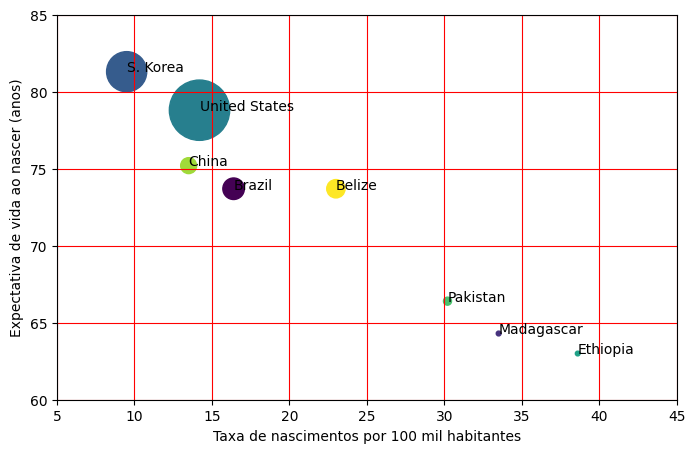

In [ ]:
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States',
             'Ethiopia', 'Pakistan', 'China', 'Belize']

# Taxa de nascimentos (/100k pessoas)
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]

# Expectativa de vida ao nascer (anos)
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]

# renda per capita (US Dollars em 2000)
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])

fig, ax = plt.subplots(figsize=(8,5))

colours = range(len(countries))

ax.scatter(x=birth_rate,
           y=life_expectancy,
           c=colours, s=GDP/20)

for x,y,pais in zip(birth_rate,life_expectancy,countries):
    ax.annotate(pais,(x,y))

ax.set_xlim(5, 45)
ax.set_ylim(60, 85)

ax.grid(True, color='red')

ax.set_xlabel('Taxa de nascimentos por 100 mil habitantes')
ax.set_ylabel('Expectativa de vida ao nascer (anos)')

Text(0, 0.5, 'Expectativa de vida ao nascer (anos)')

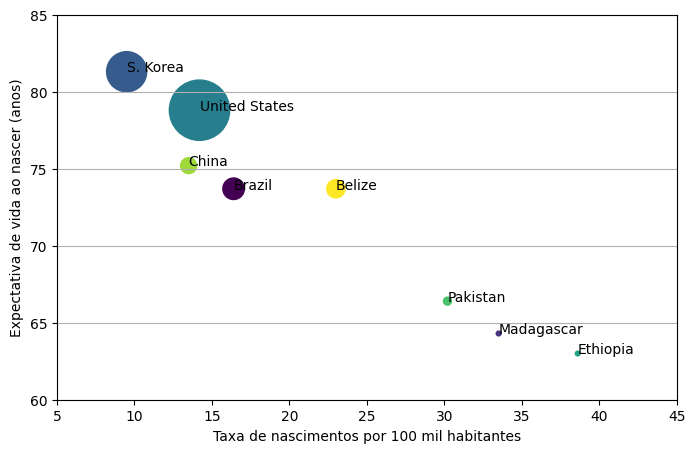

In [ ]:
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States',
             'Ethiopia', 'Pakistan', 'China', 'Belize']

# Taxa de nascimentos (/100k pessoas)
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]

# Expectativa de vida ao nascer (anos)
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]

# renda per capita (US Dollars em 2000)
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])

fig, ax = plt.subplots(figsize=(8,5))

colours = range(len(countries))

ax.scatter(x=birth_rate,
           y=life_expectancy,
           c=colours, s=GDP/20)

for x,y,pais in zip(birth_rate,life_expectancy,countries):
    ax.annotate(pais,(x,y))

ax.set_xlim(5, 45)
ax.set_ylim(60, 85)

ax.yaxis.grid(True)

ax.set_xlabel('Taxa de nascimentos por 100 mil habitantes')
ax.set_ylabel('Expectativa de vida ao nascer (anos)')

**Escala log**

- `ax.set_xscale('log')` e/ou `ax.set_yscale('log')`

Por padrão log10 é usado, mas `basex` e `basey` mudam esse comportamento.

Além disso, `symlog` considera $\log(-|x|) = -\log(|x|)$, o que pode ser útil ao lidar com valores negativos.

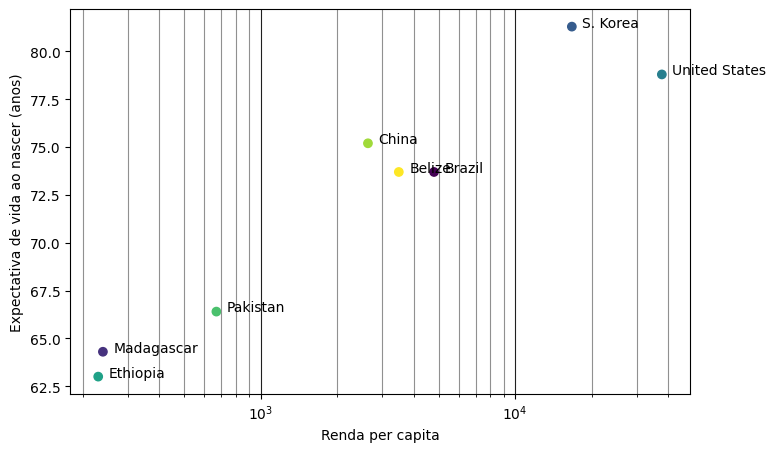

In [ ]:
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States',
             'Ethiopia', 'Pakistan', 'China', 'Belize']

# Taxa de nascimentos (/100k pessoas)
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]

# Expectativa de vida ao nascer (anos)
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]

# renda per capita (US Dollars em 2000)
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])

fig, ax = plt.subplots(figsize=(8,5))

colours = range(len(countries))

ax.scatter(x=GDP,
           y=life_expectancy,
           c=colours)

for x,y,pais in zip(GDP,life_expectancy,countries):
    ax.annotate(pais,(x*1.1,y))



ax.set_xlabel('Renda per capita')
ax.set_ylabel('Expectativa de vida ao nascer (anos)')
ax.set_xscale('log')

ax.xaxis.grid(True, which='minor', color='#909090')
ax.xaxis.grid(True, which='major', color='#202020')


**Títulos, labels e legendas**

- Nome dos eixos `ax.set_xlabel` e `ax.set_ylabel`;
- Nome da figura `ax.set_title`;
- Legenda `ax.legend`.

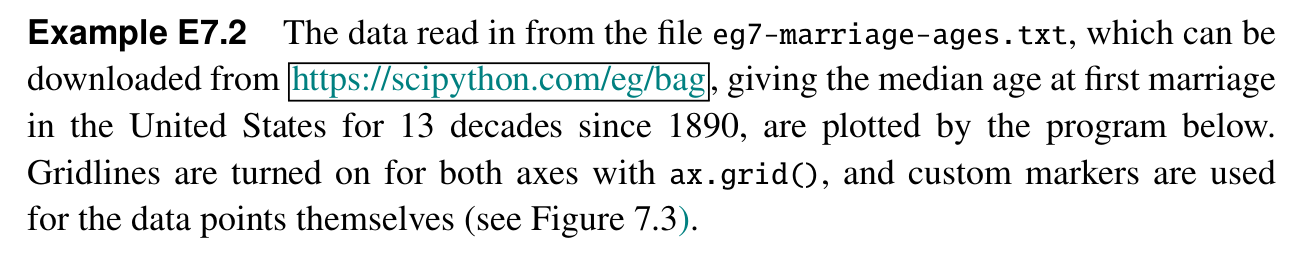

In [ ]:
!wget https://scipython.com/static/media/2/examples/E7/eg7-marriage-ages.txt

--2024-02-02 01:51:59--  https://scipython.com/static/media/2/examples/E7/eg7-marriage-ages.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413 [text/plain]
Saving to: ‘eg7-marriage-ages.txt’

eg7-marriage-ages.t 100%[===================>]     413  --.-KB/s    in 0s      

2024-02-02 01:51:59 (110 MB/s) - ‘eg7-marriage-ages.txt’ saved [413/413]



Text(0.5, 1.0, 'Idade mediana no primeiro casamento (EUA, 1890 - 2010)')

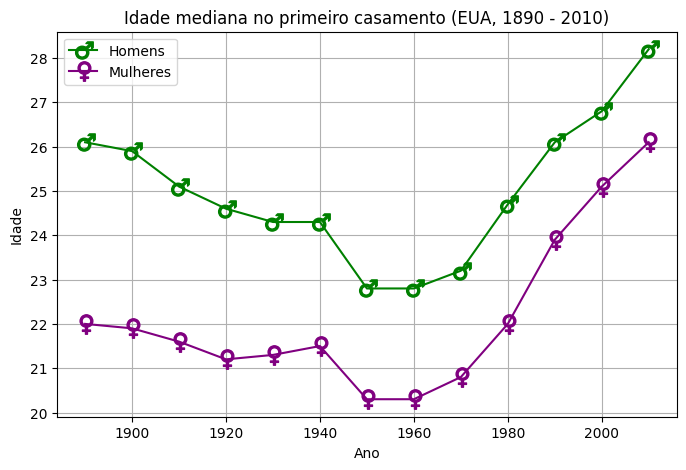

In [ ]:
year, age_m, age_f = np.loadtxt('eg7-marriage-ages.txt', unpack=True, skiprows=3)

fig, ax = plt.subplots(figsize=(8,5))

# Plot ages with male or female symbols as markers
ax.plot(year, age_m, marker='$\u2642$', markersize=14, c='green', lw=1.5,
        mfc='green', mec='green', label='Homens')
ax.plot(year, age_f, marker='$\u2640$', markersize=14, c='purple', lw=1.5,
        mfc='purple', mec='purple', label='Mulheres')

ax.grid()
ax.legend()

ax.set_xlabel('Ano')
ax.set_ylabel('Idade')
ax.set_title('Idade mediana no primeiro casamento (EUA, 1890 - 2010)')


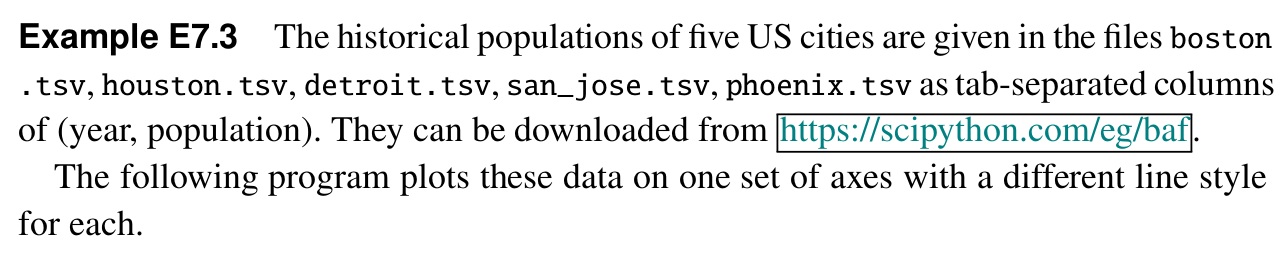

In [ ]:
!wget https://scipython.com/static/media/2/examples/E7/us-city-populations.zip

--2024-02-02 01:55:07--  https://scipython.com/static/media/2/examples/E7/us-city-populations.zip
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1357 (1.3K) [application/zip]
Saving to: ‘us-city-populations.zip’

us-city-populations 100%[===================>]   1.33K  --.-KB/s    in 0s      

2024-02-02 01:55:07 (781 MB/s) - ‘us-city-populations.zip’ saved [1357/1357]



In [ ]:
!unzip us-city-populations.zip

Archive:  us-city-populations.zip
  inflating: boston.tsv              
  inflating: detroit.tsv             
  inflating: houston.tsv             
  inflating: phoenix.tsv             
  inflating: san_jose.tsv            


Text(0, 0.5, 'População (milhões)')

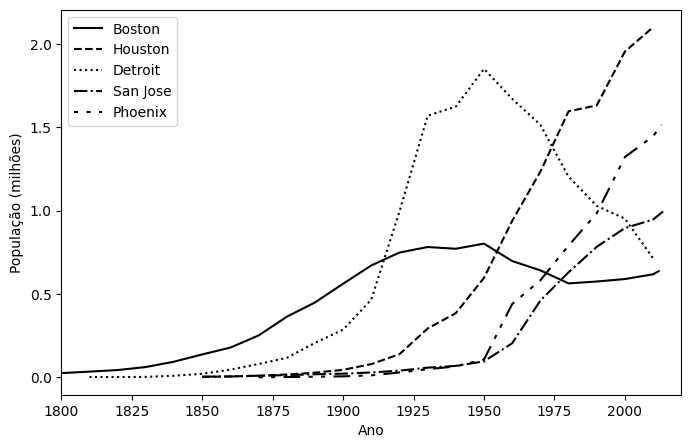

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

cities = ['Boston', 'Houston', 'Detroit', 'San Jose', 'Phoenix']

# line styles: solid, dashes, dots, dash-dots, and dot-dot-dash
linestyles = [{'ls': '-'},
              {'ls': '--'}, {'ls': ':'}, {'ls': '-.'},
              {'dashes': [2, 4, 2, 4, 8, 4]}]

for i, city in enumerate(cities):
    filename = '{}.tsv'.format(city.lower()).replace(' ', '_')
    yr, pop = np.loadtxt(filename, unpack=True)
    line, = ax.plot(yr, pop/1.e6, label=city, color='k', **linestyles[i])
ax.legend(loc='upper left')

ax.set_xlim(1800, 2020)
ax.set_xlabel('Ano')
ax.set_ylabel('População (milhões)')


**Propriedades de fonte**

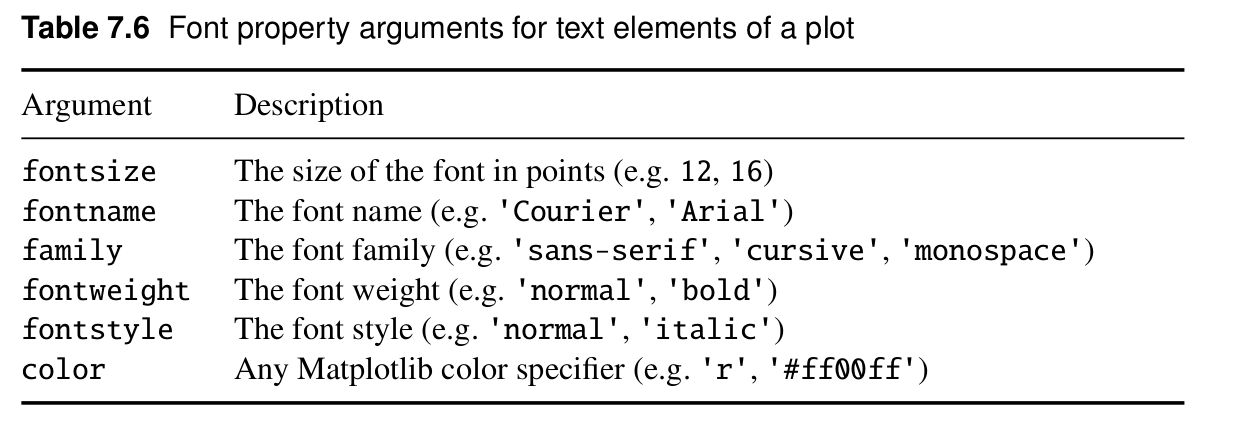

In [ ]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

cities = ['Boston', 'Houston', 'Detroit', 'San Jose', 'Phoenix']

# line styles: solid, dashes, dots, dash-dots, and dot-dot-dash
linestyles = [{'ls': '-'}, {'ls': '--'}, {'ls': ':'}, {'ls': '-.'},
              {'dashes': [2, 4, 2, 4, 8, 4]}]

for i, city in enumerate(cities):
    filename = '{}.tsv'.format(city.lower()).replace(' ', '_')
    yr, pop = np.loadtxt(filename, unpack=True)
    line, = ax.plot(yr, pop/1.e6, label=city, color='k', **linestyles[i])
ax.legend(loc='upper left')

ax.set_xlim(1800, 2020)
ax.set_xlabel('Ano')
ax.set_ylabel('População (milhões)')

ax.set_title('População de cidades estadounidenses',
             fontsize=18,
             fontname='Liberation Mono',
             color='blue',
             fontweight='bold')

Também podemos definir propriedades de font para todos os textos do matplotlib:

In [ ]:
from matplotlib import rc

font_properties = {'family': 'Liberation Mono',
                   'weight': 'bold',
                   'size': 22}
rc('font', **font_properties)

In [ ]:
year, age_m, age_f = np.loadtxt('eg7-marriage-ages.txt', unpack=True,skiprows=3)

fig, ax = plt.subplots(figsize=(8,5))

# Plot ages with male or female symbols as markers
ax.plot(year, age_m, marker='$\u2642$', markersize=14, c='green', lw=1.5,
        mfc='green', mec='green', label='Homens')
ax.plot(year, age_f, marker='$\u2640$', markersize=14, c='purple', lw=1.5,
        mfc='purple', mec='purple', label='Mulheres')

ax.grid()
ax.legend()

ax.set_xlabel('Ano')
ax.set_ylabel('Idade')
ax.set_title('Idade mediana no primeiro casamento\n (EUA, 1890 - 2010)')


In [ ]:
#para resetar
import matplotlib

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

In [ ]:
year, age_m, age_f = np.loadtxt('eg7-marriage-ages.txt', unpack=True,skiprows=3)

fig, ax = plt.subplots(figsize=(8,5))

# Plot ages with male or female symbols as markers
ax.plot(year, age_m, marker='$\u2642$', markersize=14, c='green', lw=1.5,
        mfc='green', mec='green', label='Homens')
ax.plot(year, age_f, marker='$\u2640$', markersize=14, c='purple', lw=1.5,
        mfc='purple', mec='purple', label='Mulheres')

ax.grid()
ax.legend()

ax.set_xlabel('Ano')
ax.set_ylabel('Idade')
ax.set_title('Idade mediana no primeiro casamento\n (EUA, 1890 - 2010)')

**Tick Markers**

- `ax.set_xticks([...])` e `ax.set_yticks([...])`
- `ax.set_xticklabels([...])` e `ax.set_yticklabels([...])`

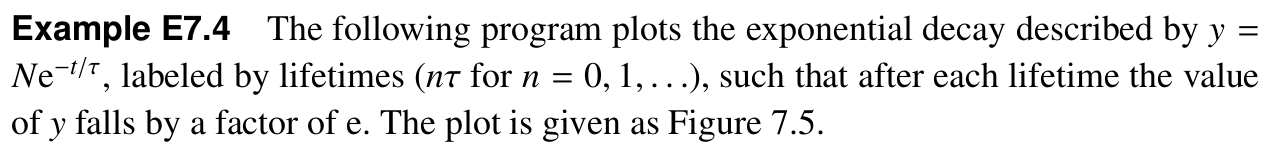

In [ ]:
# Initial value of y at t=0, lifetime in s
N, tau = 10000, 28
# Maximum time to consider (s)
tmax = 100
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(t, y)

# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
print(xticks, yticks)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/{}e$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels)

ax.set_xlabel(r'$t\;/\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()

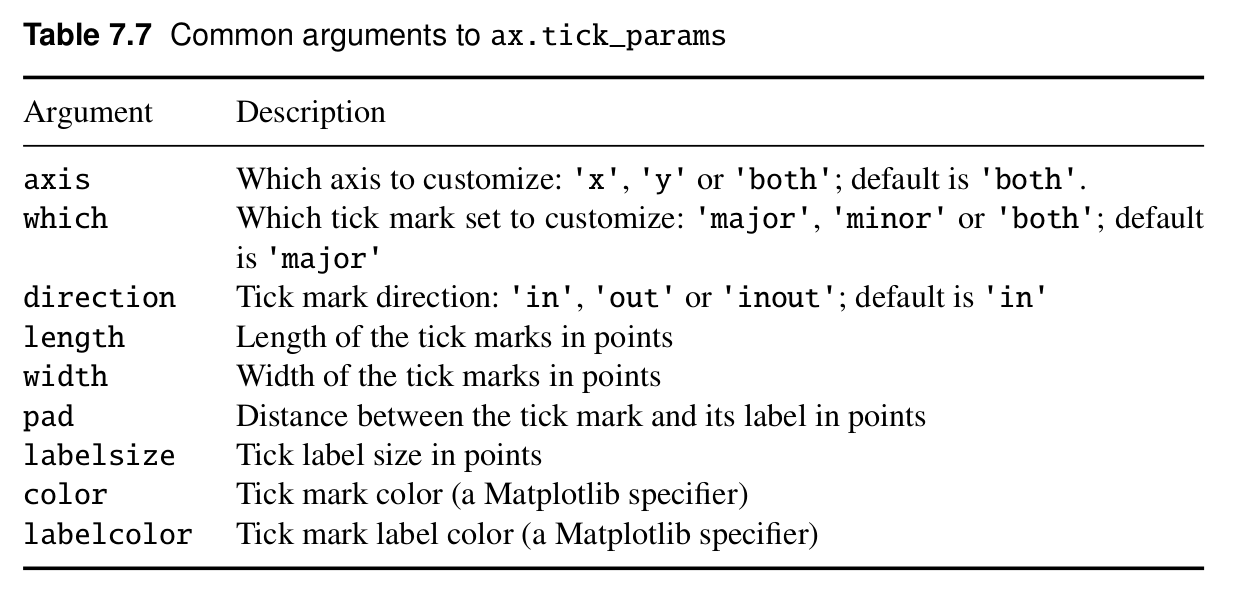

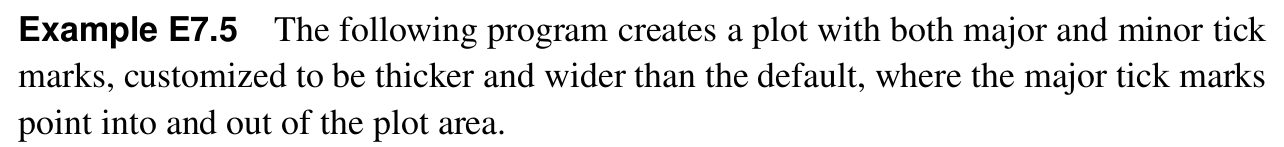

In [ ]:
# A selection of functions on rn abcissa points for 0 <= x < 1
rn = 100
rx = np.linspace(0, 1, rn, endpoint=False)

def tophat(rx):
    """ Top hat function: y = 1 for x < 0.5, y=0 for x >= 0.5 """
    ry = np.ones(rn)
    ry[rx>=0.5]=0
    return ry

# A dictionary of functions to choose from
ry = {'half-sawtooth': lambda rx: rx.copy(),
      'top-hat': tophat,
      'sawtooth': lambda rx: 2 * np.abs(rx-0.5)}

# Repeat the chosen function nrep times
nrep = 4
x = np.linspace(0, nrep, nrep*rn, endpoint=False)
y = np.tile(ry['top-hat'](rx), nrep)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x,y, 'k', lw=2)

# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1,1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)

# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')


In [ ]:
nrep = 4
x = np.linspace(0, nrep, nrep*rn, endpoint=False)
y = np.tile(ry['half-sawtooth'](rx), nrep)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x,y, 'k', lw=2)

# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1,1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)

# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')

In [ ]:
nrep = 4
x = np.linspace(0, nrep, nrep*rn, endpoint=False)
y = np.tile(ry['sawtooth'](rx), nrep)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x,y, 'k', lw=2)

# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1,1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)

# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')